# <center><font color="blue">Workshop Healthkaton BPJS Kesehatan 2024:</font></center>
## <center><font color="green"><i>The Future of Generative AI In Healthcare:<br>Trends, Innovation, and Potential</i></font></center><center><font color="black">Jum'at, 06 September 2024</font></center>

<center> <img alt="" src="images/cover.jpg"/> </center>

## <center><font color="black">Taufik Sutanto</font> ~ <font color="blue">Aptikom</font></center>

# <center><font color="blue">Slide, Code, dan Anaconda Environment:</font></center>

# Google Colab (module ini): <font color="red">https://s.id/healthkaton-2024</font>
<a href="https://s.id/healthkaton-2024"><center><img alt="" src="images/QR-Healthkaton-2024.png" width="400"/></center></a>

# <font color="green">Github: https://github.com/taudataanalytics/BPJS-Healthkaton-2024 </font>


# <center><font color="blue">Outline Workshop:</font></center>

* Contoh sederhana model GAN - MNIST
* Contoh Sederhana Model Difusi
* Load PreTrained Model - Scikit Learn
* Prompt Design & Engineering - Chatgpt
* FineTune Model GPT-4o mini ==> OpenAI PlayGround - Data Kesehatan
* Using FineTuned Model di langkah Sebelumnya

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm 

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
    !pip install openai scikit-llm
    print("preparing directories and assets")
    !mkdir data images output
    #!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all of the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all of the python module versions agree with colab environment and all data/assets downloaded


In [2]:
import torch, gc
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torchvision.utils as vutils

gc.collect()
torch.cuda.empty_cache()
seed = 6924
np.random.seed(seed)
torch.manual_seed(seed=seed)
# Set device - Make sure to change runtime type to GPU in Google Colab
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Generative Adversarial Networks (GAN) - Contoh Kasus paling sederhana

In [3]:
# Hyperparameters
batch_size = 64
nz = 100  # Ukuran noise vector (latent vector)
num_epochs = 50
lr = 0.0002

# Transformasi dataset ke tensor dan normalisasi
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalisasi gambar ke rentang [-1, 1]
])

# Load dataset MNIST
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
# Definisi Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(nz, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 784),
            nn.Tanh()  # Output values between -1 and 1
        )

    def forward(self, x):
        return self.model(x)

# Definisi Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output a probability (0 to 1)
        )

    def forward(self, x):
        return self.model(x)
"Done"

'Done'

In [5]:
# Inisialisasi model
generator = Generator()
discriminator = Discriminator()

# Optimizer dan loss function
criterion = nn.BCELoss()
optimizerG = optim.Adam(generator.parameters(), lr=lr)
optimizerD = optim.Adam(discriminator.parameters(), lr=lr)
"Done"

'Done'

In [6]:
# Training loop
for epoch in range(num_epochs):
    for i, (real_data, _) in enumerate(dataloader):
        batch_size = real_data.size(0)
        real_data = real_data.view(batch_size, -1)  # Flatten gambar

        # Real labels (1) dan fake labels (0)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train discriminator on real data
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Train discriminator on fake data
        noise = torch.randn(batch_size, nz)
        fake_data = generator(noise)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        optimizerD.zero_grad()
        d_loss.backward()
        optimizerD.step()

        # Train generator
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, real_labels)  # Trick discriminator to output 1 for fake data
        optimizerG.zero_grad()
        g_loss.backward()
        optimizerG.step()

        # Print losses setiap beberapa iterasi
        if i % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

    # Save gambar yang dihasilkan generator setiap epoch
    with torch.no_grad():
        fake_images = generator(noise).view(-1, 1, 28, 28)
        vutils.save_image(fake_images, f'output/fake_images_epoch_{epoch+1}.png', normalize=True)

print("Training selesai.")

Epoch [1/50], Step [0/938], d_loss: 1.4481, g_loss: 0.7132
Epoch [1/50], Step [500/938], d_loss: 0.0410, g_loss: 7.3215
Epoch [2/50], Step [0/938], d_loss: 0.5057, g_loss: 4.6799
Epoch [2/50], Step [500/938], d_loss: 2.2314, g_loss: 2.3508
Epoch [3/50], Step [0/938], d_loss: 0.6714, g_loss: 2.6245
Epoch [3/50], Step [500/938], d_loss: 0.9734, g_loss: 1.9141
Epoch [4/50], Step [0/938], d_loss: 0.1413, g_loss: 3.0766
Epoch [4/50], Step [500/938], d_loss: 0.1536, g_loss: 3.5699
Epoch [5/50], Step [0/938], d_loss: 0.1140, g_loss: 3.7596
Epoch [5/50], Step [500/938], d_loss: 1.8995, g_loss: 5.3174
Epoch [6/50], Step [0/938], d_loss: 0.9310, g_loss: 3.2467
Epoch [6/50], Step [500/938], d_loss: 0.3505, g_loss: 3.3792
Epoch [7/50], Step [0/938], d_loss: 0.4594, g_loss: 2.4637
Epoch [7/50], Step [500/938], d_loss: 0.2585, g_loss: 3.6701
Epoch [8/50], Step [0/938], d_loss: 0.5442, g_loss: 3.7305
Epoch [8/50], Step [500/938], d_loss: 0.2354, g_loss: 4.3546
Epoch [9/50], Step [0/938], d_loss: 0.13

# Contoh Model Difusi Paling Sederhana

In [7]:
import torch, gc
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

gc.collect()
torch.cuda.empty_cache()
seed = 6924
np.random.seed(seed)
torch.manual_seed(seed=seed)
# Set device - Make sure to change runtime type to GPU in Google Colab
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
# Hyperparameters
epochs = 5
batch_size = 64
learning_rate = 0.001
timesteps = 1000  # Number of diffusion steps

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
"Done"

'Done'

In [9]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten the image to a vector of 28*28
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 28 * 28)  # Output should match the flattened image size

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)  # Reshape back to the image dimensions
        return x

# Noise schedule
def noise_schedule(t, beta_start=0.0001, beta_end=0.02):
    return beta_start + t * (beta_end - beta_start)

# Add noise to images
def add_noise(images, t, device):
    noise = torch.randn_like(images).to(device)
    return torch.sqrt(1 - t) * images + torch.sqrt(t) * noise

# Training loop
model = SimpleNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
"Done"

'Done'

In [10]:
num_epochs = 100
for epoch in range(num_epochs):
    for images, _ in dataloader:
        images = images.to(device)
        t = torch.rand(images.size(0), 1, 1, 1).to(device)  # Add time step dimension
        t = noise_schedule(t).to(device)
        
        noisy_images = add_noise(images, t, device)
        denoised_images = model(noisy_images)
        
        loss = criterion(denoised_images, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/300], Loss: 0.0531
Epoch [31/300], Loss: 0.0461
Epoch [61/300], Loss: 0.0408
Epoch [91/300], Loss: 0.0416
Epoch [121/300], Loss: 0.0418
Epoch [151/300], Loss: 0.0455
Epoch [181/300], Loss: 0.0404
Epoch [211/300], Loss: 0.0422
Epoch [241/300], Loss: 0.0361
Epoch [271/300], Loss: 0.0455


Original Images


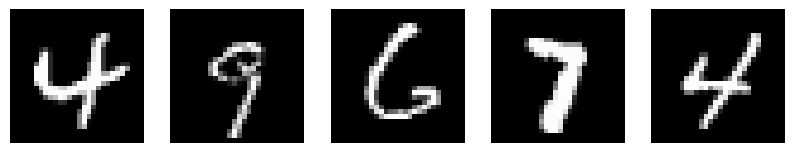

Noisy Images


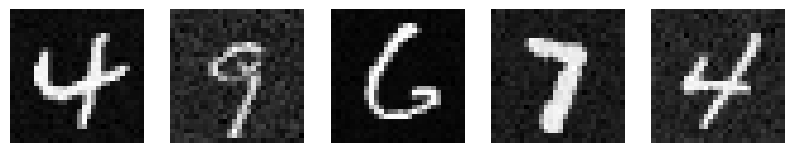

Denoised Images


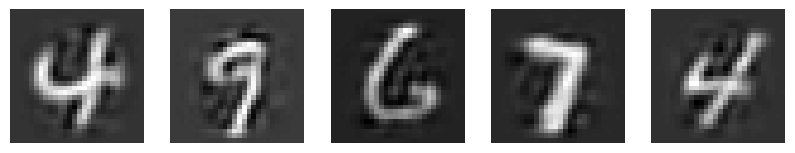

In [12]:
# Visualize original, noisy, and denoised images
def show_images(images):
    images = images.cpu().detach().numpy()
    fig, axs = plt.subplots(1, len(images), figsize=(10, 2))
    for i, img in enumerate(images):
        axs[i].imshow(img[0], cmap='gray')
        axs[i].axis('off')
    plt.show()

with torch.no_grad():
    for images, _ in dataloader:
        images = images.to(device)
        t = torch.rand(images.size(0), 1, 1, 1).to(device)
        t = noise_schedule(t).to(device)
        
        noisy_images = add_noise(images, t, device)
        denoised_images = model(noisy_images)
        
        print("Original Images")
        show_images(images[:5])
        
        print("Noisy Images")
        show_images(noisy_images[:5])
        
        print("Denoised Images")
        show_images(denoised_images[:5])
        
        break

# Using PreTrained Model - Scikit LLM

* https://skllm.beastbyte.ai/
* Create API Key: https://platform.openai.com/api-keys
* take notes of your organization ID: https://platform.openai.com/settings/organization/general

In [14]:
from openai import OpenAI

try:
    with open('openAI.txt') as f: key = f.read() # https://platform.openai.com/api-keys
    with open('org.txt') as f: org = f.read() # https://platform.openai.com/settings/organization/general
except:
    key = "" # Copy-Paste your openAI API Key here 
    org = "" # Copy-Paste your Organization ID here
    
client = OpenAI(api_key=key,)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Terangkan dalam 3 kalimat apa itu BPJS kesehatan?",
        }
    ],
    model="gpt-3.5-turbo",
)

In [21]:
chat_completion.to_dict()

{'id': 'chatcmpl-A4IVJqffTAEdpGQidLlECPo22U0LE',
 'choices': [{'finish_reason': 'stop',
   'index': 0,
   'logprobs': None,
   'message': {'content': 'BPJS Kesehatan adalah program jaminan kesehatan yang diselenggarakan oleh pemerintah Indonesia untuk memberikan fasilitas pelayanan kesehatan kepada seluruh rakyat Indonesia. Peserta BPJS Kesehatan harus membayar iuran bulanan sesuai dengan kelas layanan yang dipilih agar mendapatkan akses pelayanan kesehatan yang bermutu. Program BPJS Kesehatan mencakup berbagai jenis pelayanan kesehatan mulai dari pemeriksaan kesehatan rutin hingga perawatan medis yang membutuhkan fasilitas rumah sakit.',
    'refusal': None,
    'role': 'assistant'}}],
 'created': 1725587805,
 'model': 'gpt-3.5-turbo-0125',
 'object': 'chat.completion',
 'system_fingerprint': None,
 'usage': {'completion_tokens': 146, 'prompt_tokens': 23, 'total_tokens': 169}}

# FineTune Model GPT-4o mini ==> OpenAI PlayGround - Data Kesehatan

# Using FineTuned Model di langkah Sebelumnya

# <center><font color="blue"> Akhir Modul Workshop BPJS Healthkaton 2024</font></center>
<hr />
<center><img alt="" src="images/meme-AI-Summary.png" /></center>